In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:

total=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df3= pd.read_csv('gender_submission.csv')


In [142]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [143]:
total.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [144]:
test=test.drop('Cabin',axis=1)

In [145]:
test['Embarked']=test['Embarked'].fillna(test['Embarked'].mode())

In [146]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [147]:
outcomes = df3['Survived']
test=pd.concat([test,outcomes],axis=1)
display(test.head())
print(type(outcomes))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


<class 'pandas.core.series.Series'>


In [148]:
test=test.dropna()

In [149]:
print((263/1309)*100)
print((1014/1309)*100)

20.091673032849503
77.46371275783041


In [150]:
total=total.drop('Cabin',axis=1)

In [151]:
total=total.dropna()

In [152]:
total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


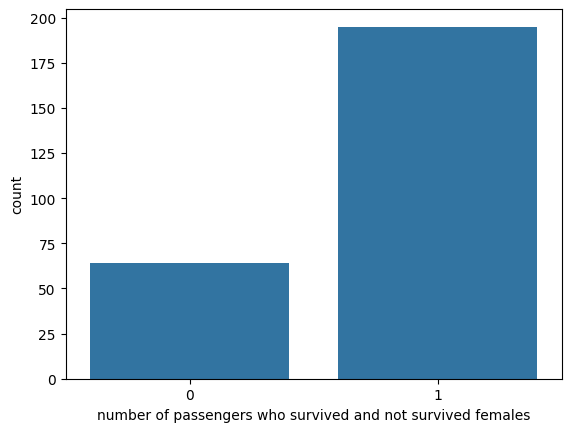

In [153]:
female_data=total[total["Sex"] == "female"]
sns.countplot(data=female_data,x='Survived');
plt.xlabel("number of passengers who survived and not survived females");

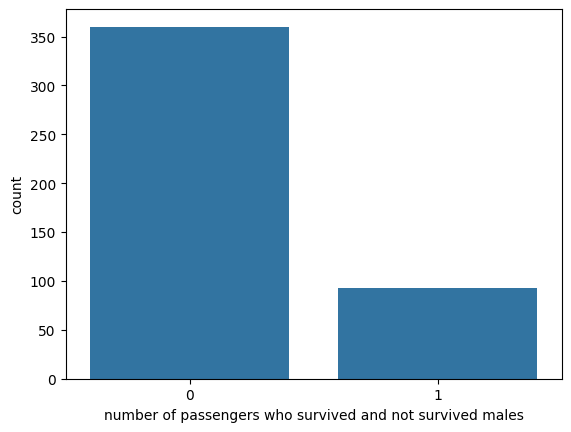

In [154]:
male_data=total[total["Sex"] == "male"]
sns.countplot(data=male_data,x='Survived');
plt.xlabel("number of passengers who survived and not survived males");

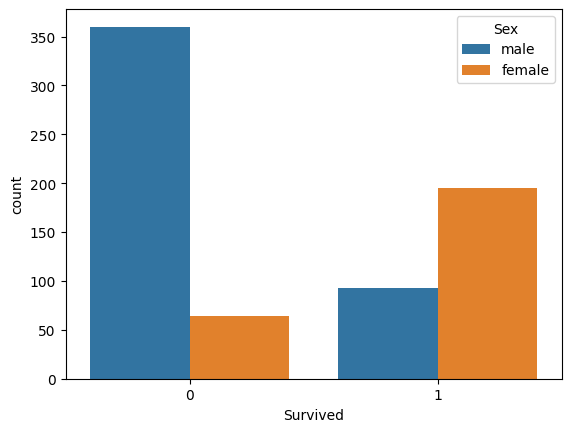

In [155]:
sns.countplot(data=total,x='Survived',hue="Sex");

**With Age**

In [156]:
total['Age']=total['Age'].astype(int)
test['Age']=test['Age'].astype(int)

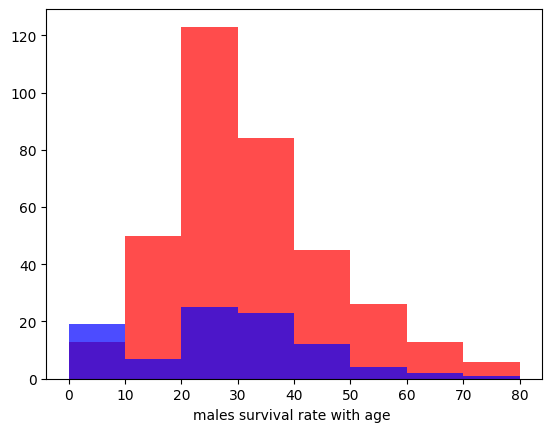

In [157]:
male_data_nsurv=total[(total["Sex"] == "male") & (total["Survived"] == 0)] # red
male_data_surv=total[(total["Sex"] == "male") & (total["Survived"] == 1)]  # blue
bins=np.arange(0,total['Age'].max()+10,10)
plt.hist(data=male_data_nsurv,x='Age',bins=bins,color="red",alpha=0.7)
plt.hist(data=male_data_surv,x='Age',bins=bins,color="blue",alpha=0.7)
plt.xlabel("males survival rate with age ");

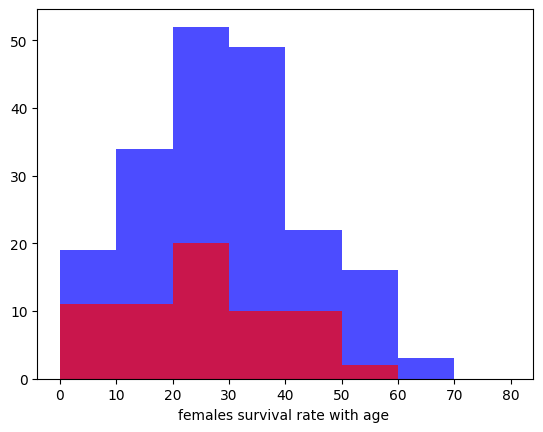

In [158]:
male_data_nsurv=total[(total["Sex"] == "female") & (total["Survived"] == 0)] # red
male_data_surv=total[(total["Sex"] == "female") & (total["Survived"] == 1)]  # blue
bins=np.arange(0,total['Age'].max()+10,10)
plt.hist(data=male_data_surv,x='Age',bins=bins,color="blue",alpha=0.7)
plt.hist(data=male_data_nsurv,x='Age',bins=bins,color="red",alpha=0.7)
plt.xlabel("females survival rate with age ");

**with Parch**


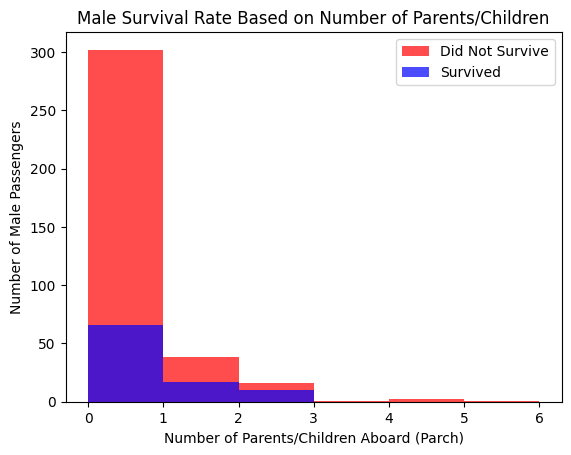

In [159]:
male_data_nsurv = total[(total["Sex"] == "male") & (total["Survived"] == 0)]
male_data_surv = total[(total["Sex"] == "male") & (total["Survived"] == 1)]
bins = np.arange(0, total['Parch'].max() + 1, 1)
plt.hist(data=male_data_nsurv, x='Parch', bins=bins, color="red", alpha=0.7, label='Did Not Survive')
plt.hist(data=male_data_surv, x='Parch', bins=bins, color="blue", alpha=0.7, label='Survived')

plt.xlabel("Number of Parents/Children Aboard (Parch)")
plt.ylabel("Number of Male Passengers")
plt.title("Male Survival Rate Based on Number of Parents/Children")
plt.legend()
plt.show()

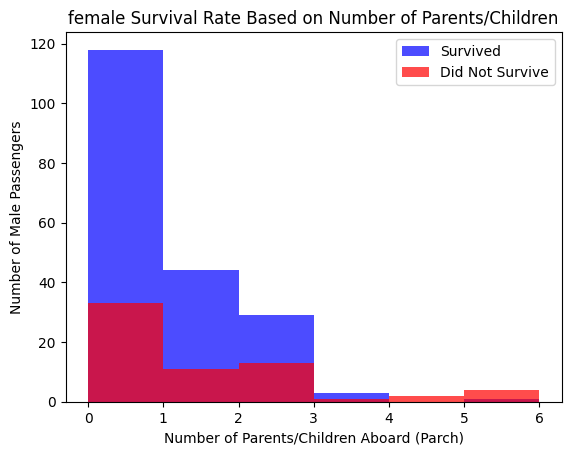

In [160]:
male_data_nsurv = total[(total["Sex"] == "female") & (total["Survived"] == 0)]
male_data_surv = total[(total["Sex"] == "female") & (total["Survived"] == 1)]
bins = np.arange(0, total['Parch'].max() + 1, 1)
plt.hist(data=male_data_surv, x='Parch', bins=bins, color="blue", alpha=0.7, label='Survived')
plt.hist(data=male_data_nsurv, x='Parch', bins=bins, color="red", alpha=0.7, label='Did Not Survive')
plt.xlabel("Number of Parents/Children Aboard (Parch)")
plt.ylabel("Number of Male Passengers")
plt.title("female Survival Rate Based on Number of Parents/Children")
plt.legend()
plt.show()

**With Pclass**

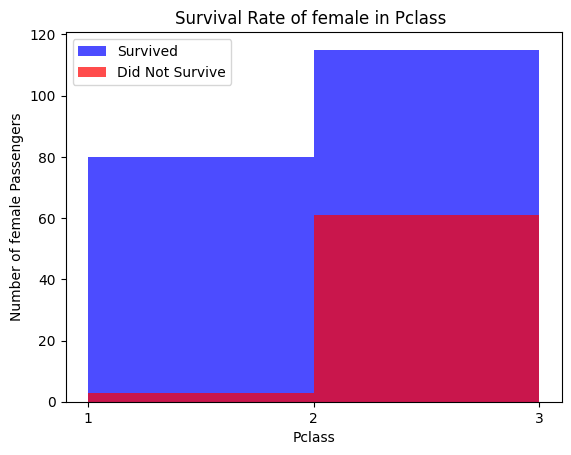

In [161]:
male_data_nsurv = total[(total["Sex"] == "female") & (total["Survived"] == 0)]
male_data_surv = total[(total["Sex"] == "female") & (total["Survived"] == 1)]
bins = np.arange(1, total['Pclass'].max() + 1, 1)
plt.hist(data=male_data_surv, x='Pclass', bins=bins, color="blue", alpha=0.7, label='Survived')
plt.hist(data=male_data_nsurv, x='Pclass', bins=bins, color="red", alpha=0.7, label='Did Not Survive')

plt.xticks(np.arange(1, 4,1))
plt.xlabel("Pclass")
plt.ylabel("Number of female Passengers")
plt.title("Survival Rate of female in Pclass ")
plt.legend()
plt.show()


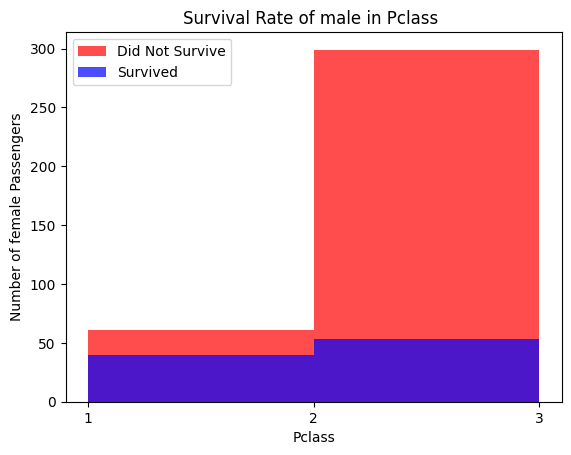

In [162]:
male_data_nsurv = total[(total["Sex"] == "male") & (total["Survived"] == 0)]
male_data_surv = total[(total["Sex"] == "male") & (total["Survived"] == 1)]
bins = np.arange(1, total['Pclass'].max() + 1, 1)
plt.hist(data=male_data_nsurv, x='Pclass', bins=bins, color="red", alpha=0.7, label='Did Not Survive')
plt.hist(data=male_data_surv, x='Pclass', bins=bins, color="blue", alpha=0.7, label='Survived')
plt.xticks(np.arange(1, 4,1))
plt.xlabel("Pclass")
plt.ylabel("Number of female Passengers")
plt.title("Survival Rate of male in Pclass ")
plt.legend()
plt.show()


**With SibSp**

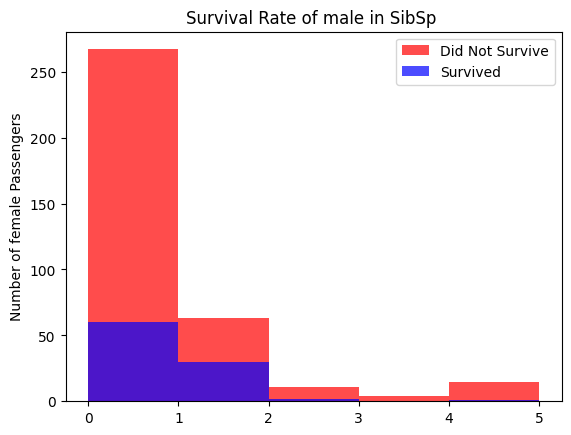

In [163]:
male_data_nsurv = total[(total["Sex"] == "male") & (total["Survived"] == 0)]
male_data_surv = total[(total["Sex"] == "male") & (total["Survived"] == 1)]
bins = np.arange(0, total['SibSp'].max() + 1, 1)
plt.hist(data=male_data_nsurv, x='SibSp', bins=bins, color="red", alpha=0.7, label='Did Not Survive')
plt.hist(data=male_data_surv, x='SibSp', bins=bins, color="blue", alpha=0.7, label='Survived')
plt.ylabel("Number of female Passengers")
plt.title("Survival Rate of male in SibSp ")
plt.legend()
plt.show()


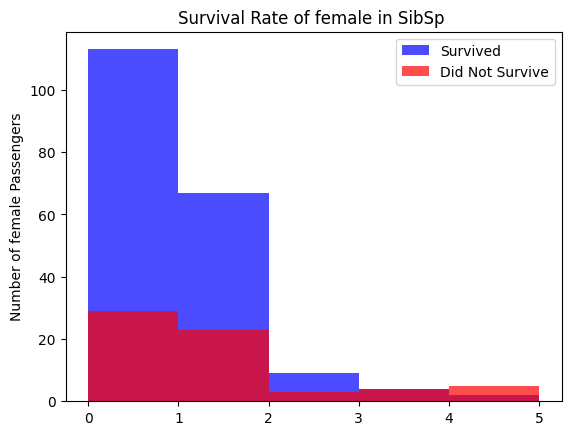

In [164]:
male_data_nsurv = total[(total["Sex"] == "female") & (total["Survived"] == 0)]
male_data_surv = total[(total["Sex"] == "female") & (total["Survived"] == 1)]
bins = np.arange(0, total['SibSp'].max() + 1, 1)
plt.hist(data=male_data_surv, x='SibSp', bins=bins, color="blue", alpha=0.7, label='Survived')
plt.hist(data=male_data_nsurv, x='SibSp', bins=bins, color="red", alpha=0.7, label='Did Not Survive')
plt.ylabel("Number of female Passengers")
plt.title("Survival Rate of female in SibSp ")
plt.legend()
plt.show()

**With Fare**

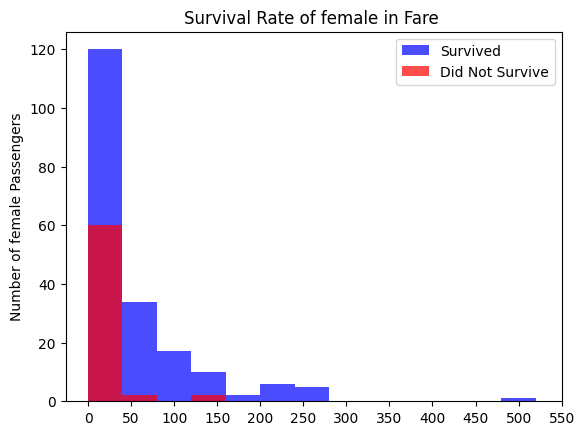

In [165]:
male_data_nsurv = total[(total["Sex"] == "female") & (total["Survived"] == 0)]
male_data_surv = total[(total["Sex"] == "female") & (total["Survived"] == 1)]
bins = np.arange(0, total['Fare'].max() + 40, 40)
plt.hist(data=male_data_surv, x='Fare', bins=bins, color="blue", alpha=0.7, label='Survived')
plt.hist(data=male_data_nsurv, x='Fare', bins=bins, color="red", alpha=0.7, label='Did Not Survive')
plt.xticks(np.arange(0, total['Fare'].max() + 50, 50)  )
plt.ylabel("Number of female Passengers")
plt.title("Survival Rate of female in Fare ")
plt.legend()
plt.show()

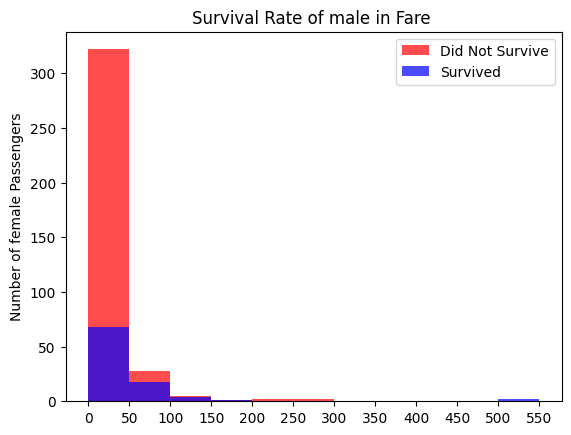

In [166]:
male_data_nsurv = total[(total["Sex"] == "male") & (total["Survived"] == 0)]
male_data_surv = total[(total["Sex"] == "male") & (total["Survived"] == 1)]
bins = np.arange(0, total['Fare'].max() + 50, 50)
plt.hist(data=male_data_nsurv, x='Fare', bins=bins, color="red", alpha=0.7, label='Did Not Survive')
plt.hist(data=male_data_surv, x='Fare', bins=bins, color="blue", alpha=0.7, label='Survived')
plt.xticks(np.arange(0, total['Fare'].max() + 50, 50)  )
plt.ylabel("Number of female Passengers")
plt.title("Survival Rate of male in Fare ")
plt.legend()
plt.show()

**With Embarked**

In [167]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    int64  
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 66.8+ KB


In [168]:
total['Embarked'].unique()
total['Embarked']=total['Embarked'].replace("Q",1).replace("S",2).replace("C",3)
total['Embarked'].unique()
total['Embarked'].astype(int)
test['Embarked'].unique()
test['Embarked']=test['Embarked'].replace("Q",1).replace("S",2).replace("C",3)
test['Embarked'].unique()
test['Embarked'].astype(int)

,Embarked
0,1
1,2
2,1
3,2
4,2
...,...
409,2
411,1
412,2
414,3


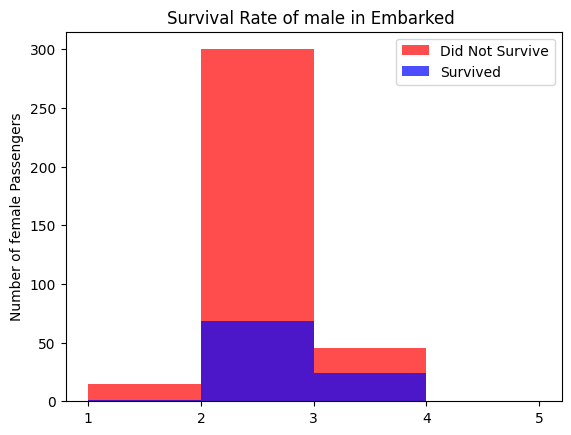

In [169]:
male_data_nsurv = total[(total["Sex"] == "male") & (total["Survived"] == 0)]
male_data_surv = total[(total["Sex"] == "male") & (total["Survived"] == 1)]
bins = np.arange(1, total['Embarked'].max() + 3, 1)
plt.hist(data=male_data_nsurv, x='Embarked', bins=bins, color="red", alpha=0.7, label='Did Not Survive')
plt.hist(data=male_data_surv, x='Embarked', bins=bins, color="blue", alpha=0.7, label='Survived')
plt.xticks(np.arange(1, total['Embarked'].max() + 3, 1) )
plt.ylabel("Number of female Passengers")
plt.title("Survival Rate of male in Embarked ")
plt.legend()
plt.show()

In [170]:
total.info()
total['Survived']=total['Survived'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    int64  
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 66.8+ KB


In [171]:
outcomes = test['Survived']
data = test.drop('Survived', axis = 1)
display(data.head())
print(type(outcomes))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,2


<class 'pandas.core.series.Series'>


In [172]:
outcomes[:5]

,Survived
0,0
1,1
2,0
3,0
4,1


In [188]:
def accuracy_score1(truth, pred):

    if len(truth) == len(pred):

        return "Predictions have an accuracy of "+str((truth == pred).mean()*100)+"%"

    else:
        return "Number of predictions does not match number of outcomes!"
predictions2=[0,1,1,1,1]
output=accuracy_score1(outcomes[:5], predictions2)
print(output)

Predictions have an accuracy of 60.0%


In [189]:
def predictions_1(data):
    """ Model with one feature:
            - Predict a passenger survived if they are female. """

    predictions = []
    for i,passenger in data.iterrows():
        if (passenger["Sex"]=="female" ) or (passenger["Age"]< 10 and passenger["Sex"]=="male" and passenger["Pclass"]>1 and passenger["Parch"]<3 and passenger["Fare"]<300 and passenger["SibSp"]<3and passenger["Embarked"]>2) :
            predictions.append(1)
        else:
            predictions.append(0)
    return pd.Series(predictions, index=data.index)

predictions = predictions_1(data)

In [190]:
print(accuracy_score1(outcomes, predictions))

Predictions have an accuracy of 99.39577039274926%


In [176]:
full=pd.concat([total,test],axis=0)
full=full.drop(['Name'],axis=1)
full['Sex']=full['Sex'].replace("male",1).replace("female",0)
full=full.drop(['Ticket'],axis=1)
full=full.drop(['PassengerId'],axis=1)
full


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,3
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
409,1,3,0,3,1,1,13.7750,2
411,1,1,0,37,1,0,90.0000,1
412,1,3,0,28,0,0,7.7750,2
414,1,1,0,39,0,0,108.9000,3


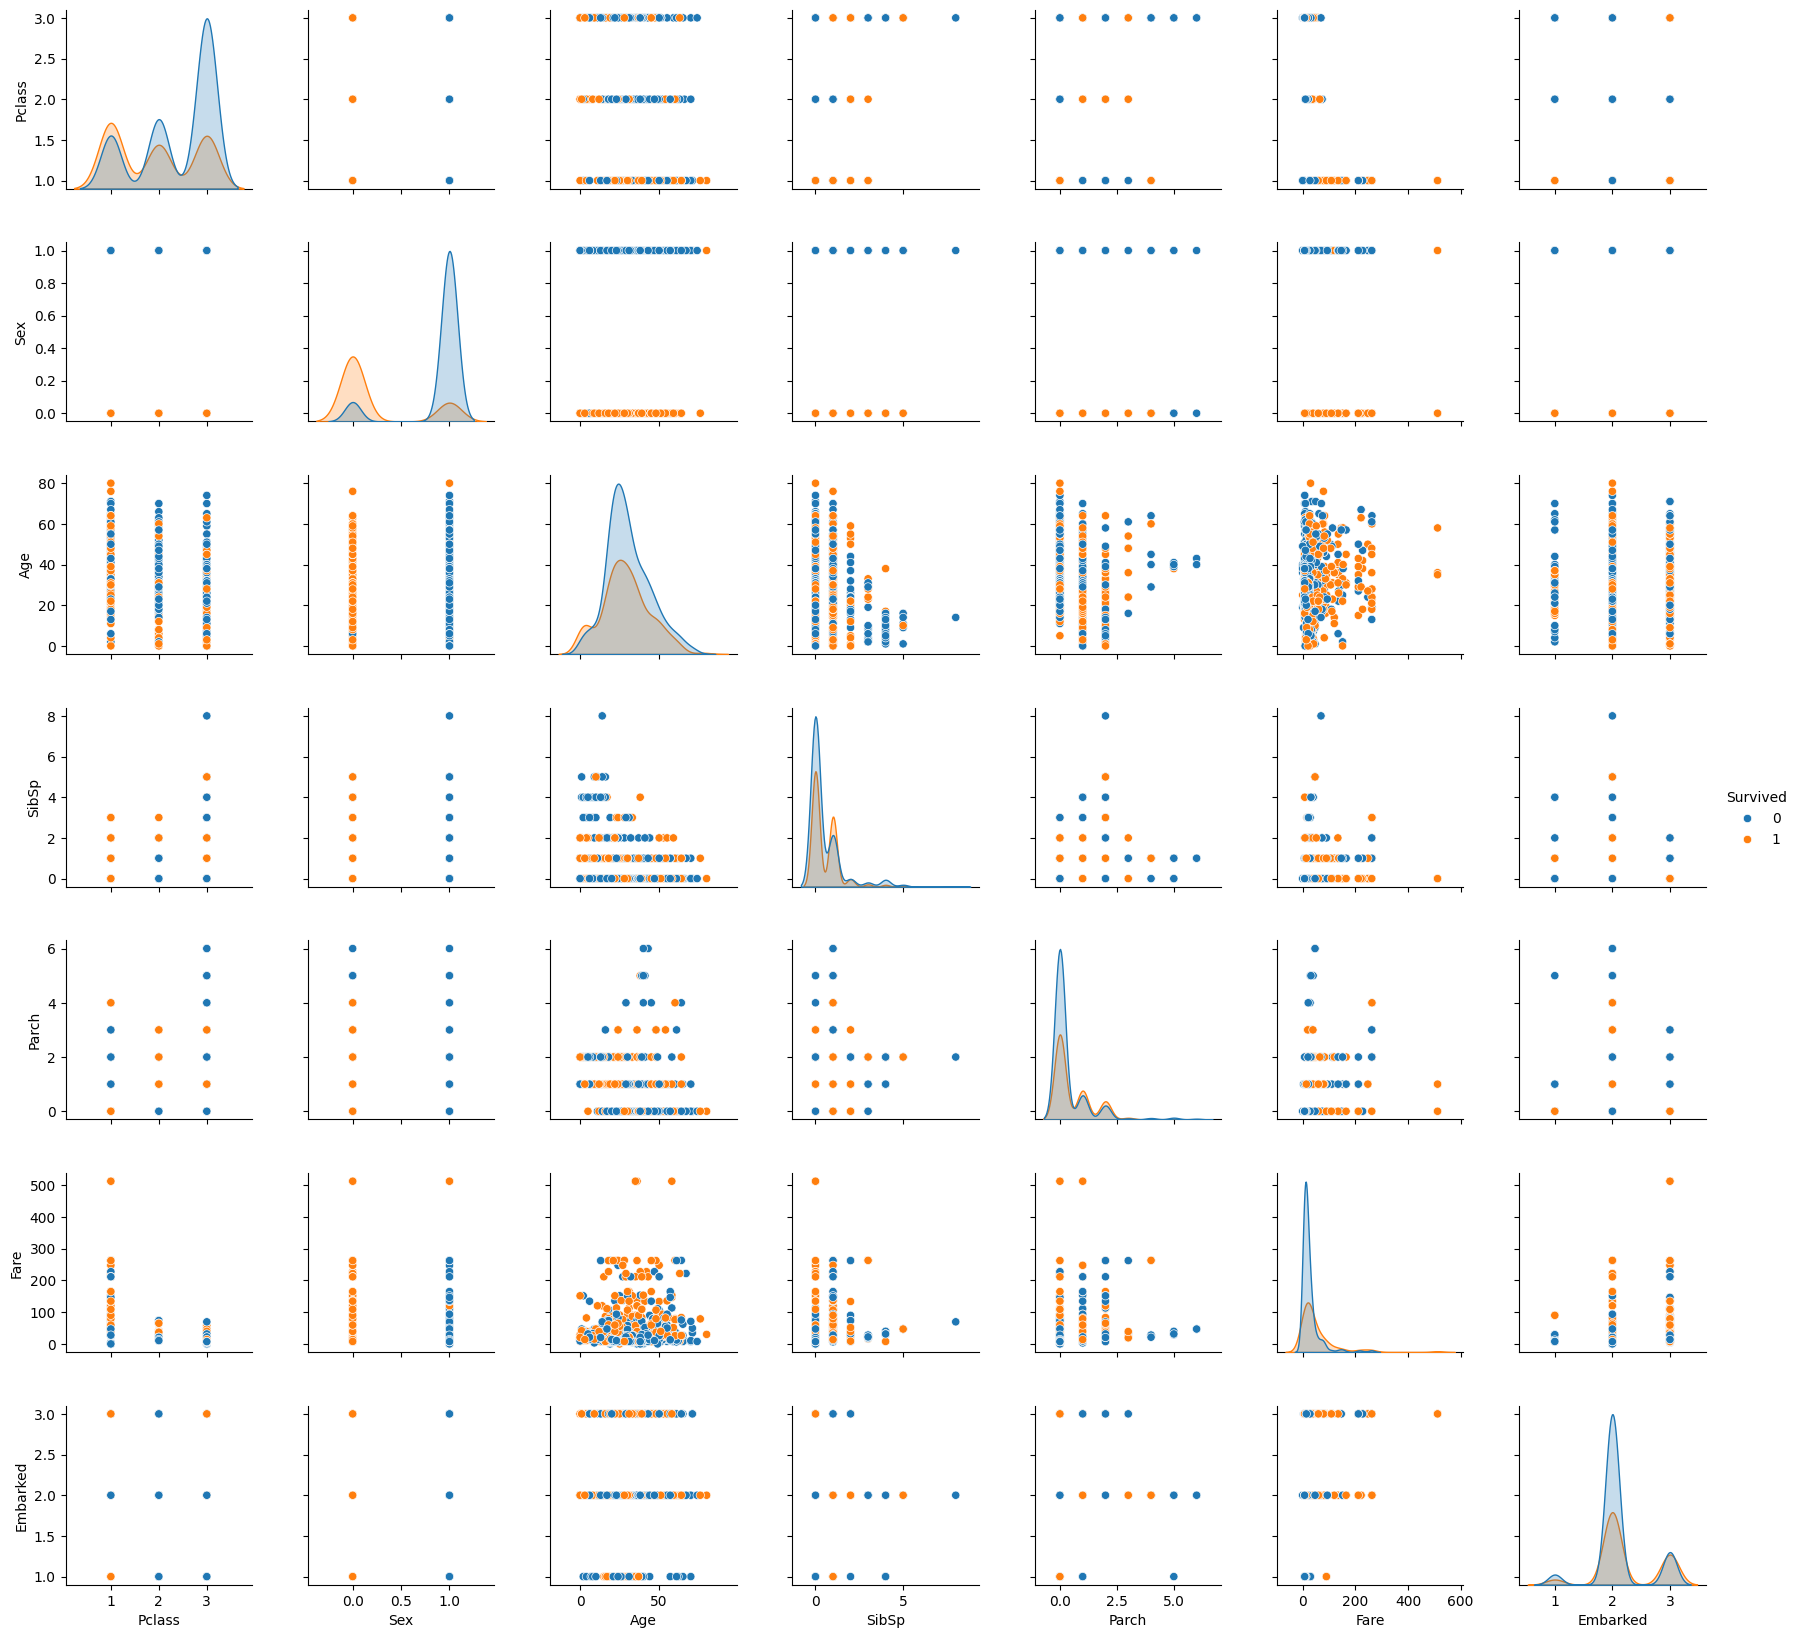

In [177]:


import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = full.columns.tolist()
sns.pairplot(full[cols_to_plot], hue='Survived', height=2.5)
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.3, wspace=0.3)
plt.show()


In [178]:

correlation_matrix = full.corr()

target_correlation = correlation_matrix['Survived'].sort_values(ascending=False)
print(target_correlation)



Survived    1.000000
Fare        0.238495
Embarked    0.129658
Parch       0.116394
SibSp       0.012254
Age        -0.055310
Pclass     -0.279133
Sex        -0.683255
Name: Survived, dtype: float64


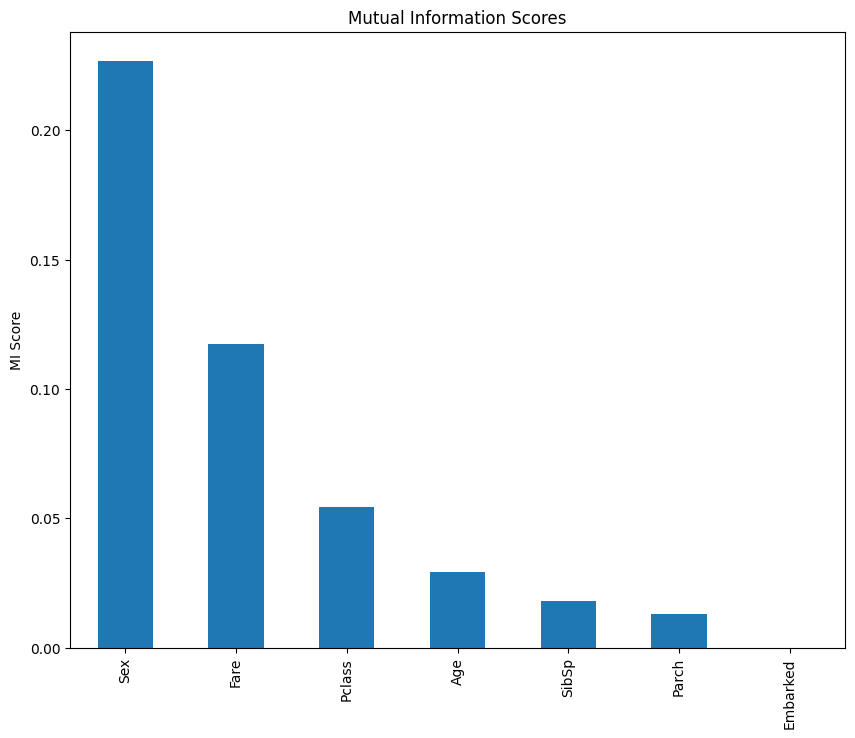

In [179]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
import matplotlib.pyplot as plt

target_column = 'Survived'

mi_scores = mutual_info_regression(full.drop(columns=target_column), full[target_column])

mi_scores_series = pd.Series(mi_scores, index=full.drop(columns=target_column).columns)

plt.figure(figsize=(10, 8))
mi_scores_series.sort_values(ascending=False).plot(kind='bar')
plt.title("Mutual Information Scores")
plt.ylabel("MI Score")
plt.show()



In [180]:
full=full.drop(['Embarked'],axis=1)
full

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22,1,0,7.2500
1,1,1,0,38,1,0,71.2833
2,1,3,0,26,0,0,7.9250
3,1,1,0,35,1,0,53.1000
4,0,3,1,35,0,0,8.0500
...,...,...,...,...,...,...,...
409,1,3,0,3,1,1,13.7750
411,1,1,0,37,1,0,90.0000
412,1,3,0,28,0,0,7.7750
414,1,1,0,39,0,0,108.9000


In [181]:
x=full.drop(['Survived'],axis=1)
y=full['Survived']

In [191]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [196]:
y_pred = model.predict(X_test)
y_pred_train= model.predict(X_train)
print('accuracy test',accuracy_score(y_test, y_pred))
print('accuracy train',accuracy_score(y_train, y_pred_train))

accuracy test 0.8466453674121406
accuracy train 0.8506849315068493


In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier( random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [198]:
y_pred1 = rf.predict(X_test)
y_pred_train1= rf.predict(X_train)
print('accuracy test',accuracy_score(y_test, y_pred1))
print('accuracy train',accuracy_score(y_train, y_pred_train1))

accuracy test 0.8498402555910544
accuracy train 0.9931506849315068


In [199]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [202]:
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)
y_pred_train2= best_model.predict(X_train)
print('accuracy test',accuracy_score(y_test, y_pred2))
print('accuracy train',accuracy_score(y_train, y_pred_train2))

accuracy test 0.8690095846645367
accuracy train 0.873972602739726


<Axes: >

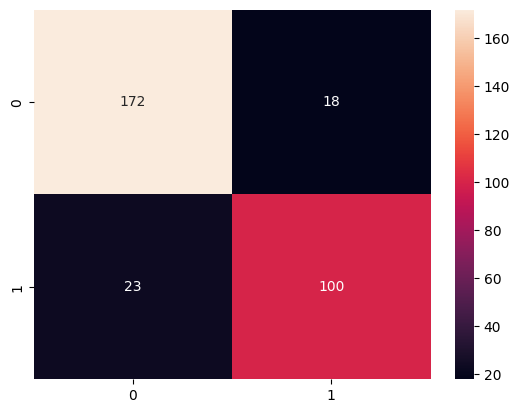

In [203]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       190
           1       0.85      0.81      0.83       123

    accuracy                           0.87       313
   macro avg       0.86      0.86      0.86       313
weighted avg       0.87      0.87      0.87       313

